In [1]:
# importing the libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# retreiving the train data

train_df = pd.read_csv("/content/train.csv")
train_df[:5]

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

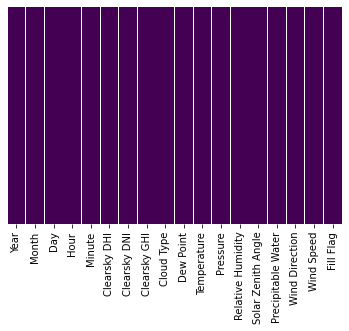

In [18]:
# exploratory data analysis

# checking for missing values:-
sns.heatmap(train_df.isna(), yticklabels=False, cbar=False, cmap='viridis')

# we see that there are no missing values present in this training data

In [4]:
# Splitting the data into independent and dependent variables
X = train_df.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
X[:5]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [5]:
# dependent variables
y1 = train_df['Clearsky DHI']
y2 = train_df['Clearsky DNI']
y3 = train_df['Clearsky GHI']

In [6]:
# splitting the data into training and testing for model evaluation
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X,y1,test_size=0.3, random_state=3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y2,test_size=0.3, random_state=3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y3,test_size=0.3, random_state=3)


In [7]:
# building models for each of the dependent variables
from sklearn.ensemble import RandomForestRegressor
# intialize the models
model1 = RandomForestRegressor(n_estimators=350, n_jobs=-1)
model2 = RandomForestRegressor(n_estimators=350, n_jobs=-1)
model3 = RandomForestRegressor(n_estimators=350, n_jobs=-1)

In [8]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {'max_depth':[1,5,7],
              'n_estimators':[250,350],
              'learning_rate':[0.01,0.1,0.2],
              'tree_method':['gpu_hist']
              }

grid_search1 = GridSearchCV(XGBRegressor(),param_grid, verbose=3)
grid_search2 = GridSearchCV(XGBRegressor(),param_grid, verbose=3)
grid_search3 = GridSearchCV(XGBRegressor(),param_grid, verbose=3)

In [9]:
grid_search1.fit(X1_train,y1_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.869 total time=   3.2s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.873 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.870 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.866 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.868 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.893 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.895 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.893 total time=   

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [14]:
grid_search2.fit(X2_train,y2_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.941 total time=   0.8s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.941 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.942 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.943 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.942 total time=   0.7s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.959 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.959 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.959 total time=   

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [16]:
grid_search3.fit(X3_train,y3_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.960 total time=   0.8s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.961 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.961 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.962 total time=   0.6s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=250, tree_method=gpu_hist;, score=0.960 total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.985 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.985 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=350, tree_method=gpu_hist;, score=0.986 total time=   

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [17]:
from sklearn.metrics import mean_squared_error
grid_pred1 = grid_search1.predict(X1_test)
grid_pred2 = grid_search2.predict(X2_test)
grid_pred3 = grid_search3.predict(X3_test)
print(mean_squared_error(y1_test, grid_pred1))
print(mean_squared_error(y2_test, grid_pred2))
print(mean_squared_error(y3_test, grid_pred3))

77.5310216121834
612.2086775935009
20.140563465788812


In [52]:
# train all the 3 models
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=350, n_jobs=-1)

In [53]:
# prediction time
model1_pred = model1.predict(X1_test)
model2_pred = model2.predict(X2_test)
model3_pred = model3.predict(X3_test)

In [54]:
# evaluation metrics - Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Model 1 MSE:", mean_squared_error(y1_test, model1_pred))
print("Model 2 MSE:", mean_squared_error(y2_test, model2_pred))
print("Model 3 MSE:", mean_squared_error(y3_test, model3_pred))

Model 1 MSE: 104.93799664397886
Model 2 MSE: 1091.4957825636695
Model 3 MSE: 40.53877118354463


In [18]:
test_data = pd.read_csv('/content/test.csv')
test_data[:5]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [19]:
X_test = test_data.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'], axis=1)

In [20]:
X_test = X_test[X1_train.columns]

In [21]:
X_test[:5]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0


In [22]:
pred1 = grid_search1.predict(X_test)
pred2 = grid_search2.predict(X_test)
pred3 = grid_search3.predict(X_test)

In [59]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [31]:
submission = pd.DataFrame()
submission['Clearsky DHI'] = pred1
submission['Clearsky DNI'] = pred2
submission['Clearsky GHI'] = pred3

In [32]:
submission['Clearsky DHI'] = submission['Clearsky DHI'].astype("int")
submission['Clearsky DNI'] = submission['Clearsky DNI'].astype("int")
submission['Clearsky GHI'] = submission['Clearsky GHI'].astype("int")

In [33]:
submission[:5]

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,8,-2,0
1,5,-2,0
2,7,-2,0
3,5,-2,0
4,1,0,0


In [34]:
submission.to_csv('submission.csv', index=False)